#  Détermination des Valeurs Aberrantes (Outliers)

Lors de l'analyse des données, les jeux de données comportent souvent des irrégularités et des erreurs. Cela peut être des données manquantes ou des données aberrantes ou autres. Savoir traiter ces données permettra de produire une analyse pertinent ou contruire un modèle prédictif accru et efficace.

Dans ce cours, nous allons nous interesser aux données ayant des valeurs aberrantes ou les Outliers. 

Ainsi, on verra :

- Ce que c’est qu'une valeur aberrante (Outlier en anglais)
- Pourquoi est-ce qu'il important de détecter les outliers
- Comment détecter les outliers
- Comment réagir face aux outliers


## Qu’est ce qu’une valeur aberrante ?

Une valeur aberrante est une valeur extrême, anormalement différente de la distribution d’une variable. En d’autres termes, la valeur de cette observation diffère grandement des autres valeurs de la même variable.

Par exemple, si on prend la variable Salaire d'une population, l’ensemble des valeurs constituent une distribution de la variable Salaire. Imaginons qu’en général, pour cette distribution, les salaires varient entre 1 500 et 3 000. Si on observe un individu avec un salaire à 10 000, c’est une valeur extrême. On dira qu’il s’agit d’un outlier.

Dans le même sens, imaginons qu’une personne touche 200 seulement, c’est un salaire anormalement bas. Il s’agit également d’une valeur aberrante.

## Pourquoi il est important de détecter un Outlier ?

Les valeurs aberrantes influencent certains paramètres statistiques, comme la **moyenne**. Elles peuvent tirer la moyenne vers le haut ou vers le bas et cela peut fausser notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier. Détecter ses Outliers nous permettra de faire des suppositions plus aguerries.

**Plusieurs algorithmes de Machine Learning sont sensibles aux données d’entrainement ainsi qu’à leurs distributions**. Avoir des Outliers dans le Training Set d’un algorithme de Machine Learning peut rendre la phase d’entrainement plus longue et fondé sur des variables biaisées. Par conséquent, le modèle prédictif produit ne sera pas performant, ou du moins, loin d’être optimal.



## Comment détecter les Outliers ?

La détection des outliers peut se faire à l’aide de méthodes de visualisation. Notamment avec les **Box Plot** ou les **Scatter Plot**. 
Mais ils peuvent aussi être déterminés à l'aide des indicateurs statistiques via la méthode des **z-score** et la méthode basée sur **l'écart interquartiles**

In [12]:
## importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('datasets/data.csv')

In [14]:
data.head()

,product_id,price
0,3847,24.2
1,3849,34.3
2,3850,20.8
3,4032,14.1
4,4039,46.0


### Détection univariée des outliers avec les Box Plot

Il s’agit de la méthode la plus simple. Les **Box Plot (Boîtes à Moustaches)** permettent de visualiser la distribution d’une seule variable. Ces graphiques se basent sur la mediane, ainsi que les quartiles inférieur et superieur Q_{1} et Q_{3} respectivement.

Un outlier est toute valeur extrême, supérieure ou inférieure à N fois l’écart interquartile IQR. Généralement N vaut N= 1,5.

<img src="images/box-plot2.png" alt="drawing" width="200" height="200"/>

<AxesSubplot:>

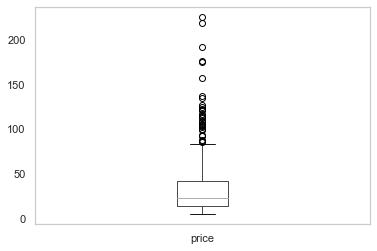

In [15]:
## Exemple 1
# On plot
data.boxplot(column =['price'], grid = False) 


<AxesSubplot:xlabel='price'>

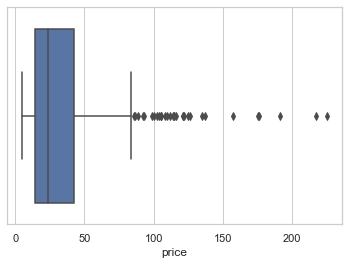

In [16]:
## Exemple 2
import seaborn as sns
# on plot
sns.set(style="whitegrid") 
sns.boxplot(x = 'price', data = data) 

### Détection multivariée des outliers avec les Scatter plot

Parfois, on peut être amené à vouloir détecter des valeurs aberrantes en fonction de plusieurs données. Il s’agit alors de détecter les outliers dans une relation entre variables. Cela peut être intéressant pour mettre en évidence une corrélation entre deux features.

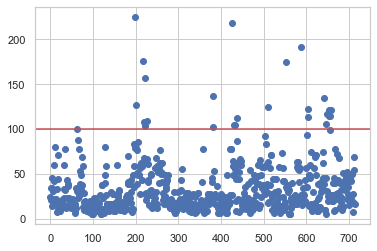

In [18]:
# On plot
plt.scatter(data['price'].index, data['price'].values)
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

Dans cet exemple on remarque que toutes les valeurs supérieures à 100 sont éloignées des valeurs sous cette limite. Elles représentent potentiellement des valeurs aberrantes. 

### Méthode du z score (supérieur à 2 standard deviation)
#### Z score = (Observation - Mean)/standard deviation

In [19]:
# On récupère la colonne price sous la forme d'une serie Pandas
price = data['price']

In [20]:
# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [21]:
# On observe
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)

Nombre d'outliers détectés => 14
[225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 135.0, 116.4, 121.0, 121.0]


##  Méthode des interquartiles

### 1,5 fois la distance interquartile avant le premier et après le troisième

In [22]:
# On ordonne la serie
price = sorted(price)

In [23]:
# On calcule l'interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(round(q3,2)))
print("IQR => " + str(round(iqr,2)))

Q1 => 14.1
Q3 => 42.18
IQR => 28.08


In [24]:
# On calcule les valeurs limite
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print("Lower_bound => " + str(round(lower_bound,2)))
print("Upper_bound => " + str(round(upper_bound,2)))

Lower_bound => -28.01
Upper_bound => 84.29


In [25]:
# On cherche les outliers
result = data[(data['price'] > upper_bound) | (data['price'] < lower_bound)]
# On observe
print("Nombre d'outliers détectés => " + str(len(result)))
print(list(result['price']))

Nombre d'outliers détectés => 32
[100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


### Comment réagir face aux valeurs aberrantes ?
Les valeurs aberrantes sont des observations extrêmes indiquant une situation extraordinaire. Dans ce sens, un outlier n’est pas forcement une valeur impertinente. Pour donner un sens à un outlier, il faut comprendre le contexte métier de la donnée.

Par conséquent, **il ne faut pas les supprimer systématiquement avant d’avoir compris leur sens d’apparition dans le jeu de données.**

Avant de supprimer ou garder une observation aberrante, posez- vous les questions suivantes:

- Est-ce une valeur due à une erreur de mesure ou de collecte d’information ?
- Est-ce d’un point de vue métier cette valeur est possible ?
- Si je garde cette observation, sera-t-elle bénéfique pour mon modèle prédictif ?

### Valeur aberrante due à une erreur de collecte d’information
Si en regardant l’information portée par cette valeur aberrante on se rend compte que d’un point de vue sémantique, ce n’est plausible ou logique, il faudra supprimer cette valeur.

Comme exemple, prenons un jeu de données contenant des prises de températures d’eau. Si on trouve une valeur de température à 150°C, on se dira que cela est impossible. En effet, l’eau s’évapore à 100°C. Cette valeur à 150°C est donc vide de sens et faudra supprimer cette observation.

Par ailleurs, le fait de trouver dans le jeu de données, une observation de température d’eau à 150°C peut être dû à une erreur de saisie de la valeur ou une défaillance du capteur (thermomètre).